In [2]:
%%capture
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import numpy 
import numpy as np

#hyper params
num_epoch = 20
cuda_device = 1
batch_size = 140
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
input_d = 28*28
hidden_d = 512
out_d = 10

#model
class MyModel(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int, out_dim: int,):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim, bias=True)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim, bias=True)
        self.linear3 = nn.Linear(hidden_dim, out_dim)

        self.activation = nn.Sigmoid()
        #self
    def forward(self, x):
        x = self.activation(self.linear1(x))
        x = self.activation(self.linear2(x))
        x = self.activation(self.linear3(x)) #activation(self.linear3(x))

        return x


def collate_fn(data): ##
    pics = []
    targets = []
    # data = [(pic, target), ....]
    for item in data:
        pics.append(numpy.array(item[0]))
        targets.append(item[1])

    return {
        'data': torch.from_numpy(numpy.array(pics)) / 255,
        'target': torch.from_numpy(numpy.array(targets))
    }


# init model

In [3]:
device

device(type='cuda')

In [4]:
#%%capture
model = MyModel(input_d, hidden_d, out_d)
model = model.to(device)

#optimizer
optim = torch.optim.Adam(model.parameters(), lr=0.001)

#lr scheduler

#dataset
dataset = datasets.MNIST('C:\\Users\\Vampire\\Repos\\NN_reload_stream2', download=True)

train_dataset = dataset
valid_dataset = dataset

dataset_size = len(train_dataset)
indices = list(range(dataset_size))
split = int(np.floor(0.2 * dataset_size))


shuffle=True
random_seed = 42
if shuffle == True:
    np.random.seed(random_seed)
    np.random.shuffle(indices)


train_idx, valid_idx = indices[split:], indices[:split]
print(len(train_idx), len(valid_idx))




train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
test_sampler = torch.utils.data.SubsetRandomSampler(valid_idx)


criterion = nn.CrossEntropyLoss()

# train loop
for epoch in range(num_epoch):
    #dataloder
    data_loader = DataLoader(dataset=dataset,
                             batch_size=batch_size,
                             #shuffle=True,
                             collate_fn=collate_fn,
                             drop_last=True, sampler = train_sampler
                             )
    for i, batch in enumerate(data_loader):
        optim.zero_grad()
        data = batch['data'].to(device).float()
        predict = model(data.view(data.size(0), -1))
        
        loss = criterion(predict, batch['target'].long().to(device))
        loss.backward()
        #print(loss)
        optim.step()
        if (i % 100) == 0:
            print(loss)



48000 12000
tensor(2.3029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5952, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5797, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5757, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5441, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5505, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5487, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5628, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5281, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5151, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4988, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4941, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5139, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4977, device='cuda:

<class 'torch.Tensor'>


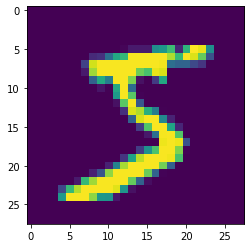

tensor(1.4705, device='cuda:0', grad_fn=<NllLossBackward0>)

In [5]:

import matplotlib.pyplot as plt
plt.imshow(dataset.data[0].detach().numpy())
print(type(dataset.data[0]))
plt.show()
loss

In [6]:
#print(collate_fn(dataset))

In [7]:
def test_one_image(I, model):
    '''
    I - 28x28 uint8 numpy array
    '''
    model.eval()
    #print(torch.tensor(I/255).size())
    batch = torch.tensor(I/255).unsqueeze(0)
    #print(batch.size())
    batch = batch.view(batch.size(0), -1)
    #print(batch.size()) 
    with torch.no_grad():
        batch = batch.to(device)
        output = model( batch )
        #output = torch.argmax(output, 1)
    return output

index = 255
item = dataset[index]

image = torch.from_numpy(numpy.array(item[0])) 

test_one_image(image, model)




C:\Users\Vampire\AppData\Local\Temp\ipykernel_12720\3577221052.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(I/255).unsqueeze(0)


tensor([[1.6762e-10, 5.8112e-06, 6.6877e-09, 1.0000e+00, 6.6071e-16, 2.5134e-07,
         1.3398e-18, 5.4522e-11, 3.2390e-08, 3.8766e-08]], device='cuda:0')

C:\Users\Vampire\AppData\Local\Temp\ipykernel_12720\887067205.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(image).clone().detach().numpy())


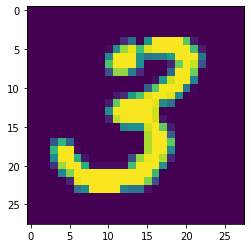

In [8]:
plt.imshow(torch.tensor(image).clone().detach().numpy())
plt.show()

In [9]:
data_loader_test = DataLoader(
                                 dataset=dataset,
                                 batch_size=12000,
                                 #shuffle=True,
                                 collate_fn=collate_fn,
                                 drop_last=True, sampler = test_sampler
                             )

In [10]:
model.eval()
with torch.no_grad():
    for i, batch in enumerate(data_loader_test):
        data = batch['data'].to(device).float()
        predict = model(data.view(data.size(0), -1))
        loss = criterion(predict, batch['target'].long().to(device))
        #loss.backward()
        #print(loss)
        #optim.step()
        if (i % 100) == 0:
            print(loss, i)
loss.mean()

tensor(1.4842, device='cuda:0') 0


tensor(1.4842, device='cuda:0')

In [13]:
index = valid_idx[0]
item = dataset[index]

image = torch.from_numpy(numpy.array(item[0])) 

test_one_image(image, model)

C:\Users\Vampire\AppData\Local\Temp\ipykernel_12720\3577221052.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(I/255).unsqueeze(0)


tensor([[7.6687e-09, 1.8417e-08, 2.3209e-11, 1.9339e-07, 1.4665e-13, 3.0127e-08,
         3.5859e-21, 1.0000e+00, 9.2704e-13, 5.6125e-04]], device='cuda:0')

C:\Users\Vampire\AppData\Local\Temp\ipykernel_12720\887067205.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(image).clone().detach().numpy())


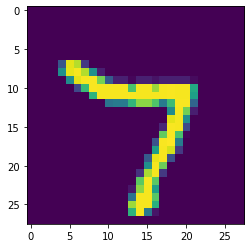

In [14]:
plt.imshow(torch.tensor(image).clone().detach().numpy())
plt.show()

In [38]:
#сверточные
import torch.nn.functional as fun
num_epoch = 20
cuda_device = -1
batch_size = 140
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
input_ch = 1
hidden_ch = 256
hidden_neurons = 768
hidden_neurons1 = 512
out_d = 10

#model
class MyModelCNN(nn.Module):
    def __init__(self,
                 in_channels: int,
                 hidden_channels: int,
                 n_classes: int,
                 ):
        super().__init__()
        # TODO change architecture
        # TODO use pooling
        self.conv1 = nn.Conv2d(in_channels, hidden_channels, kernel_size=5, padding=2, stride=2) # 14 * 14
        # TODO add batchnorm after each conv
        self.conv1_bn1 = nn.BatchNorm2d(hidden_channels)
        self.conv2 = nn.Conv2d(hidden_channels, hidden_channels, kernel_size=3, padding=1, stride=1)
        self.conv2_bn2 = nn.BatchNorm2d(hidden_channels)
        self.conv3 = nn.Conv2d(hidden_channels, 1, kernel_size=1, padding=0, stride=1)
        self.conv3_bn3 = nn.BatchNorm2d(hidden_channels)
        self.linear1 = nn.Linear(14*14, hidden_neurons, bias=True)
        self.linear2 = nn.Linear(hidden_neurons, hidden_neurons1, bias=True)
        self.linear3 = nn.Linear(hidden_neurons1, n_classes, bias = True)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.conv1_bn1(x)
        x = self.activation(self.conv2(x))
        x = self.conv2_bn2(x)
        x = self.activation(self.conv3(x))
        #x = self.conv_bn3(x)
        x = self.activation(self.linear1(x.view(x.size(0), -1)))
        x = self.activation(self.linear2(x))
        x = self.activation(self.linear3(x))
        return x


def collate_fn(data):
    pics = []
    targets = []
    # data = [(pic, target), ....]
    for item in data:
        pics.append(numpy.array(item[0]))
        targets.append(item[1])

    return {
        'data': torch.from_numpy(numpy.array(pics)) / 255,
        'target': torch.from_numpy(numpy.array(targets))
    }

# init model
model = MyModelCNN(input_ch, hidden_ch, out_d)
model = model.to(device)
model.train()
#optimizer
optim = torch.optim.Adam(model.parameters(), lr=0.005)

In [39]:


#lr scheduler

#dataset
dataset = datasets.MNIST('/Users/Vampire/Repos/NN_reload_stream2', download=False)

train_dataset = dataset
valid_dataset = dataset

dataset_size = len(train_dataset)
indices = list(range(dataset_size))
split = int(np.floor(0.2 * dataset_size))


shuffle=True
random_seed = 42
if shuffle == True:
    np.random.seed(random_seed)
    np.random.shuffle(indices)


train_idx, valid_idx = indices[split:], indices[:split]
print(len(train_idx), len(valid_idx))
train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
test_sampler = torch.utils.data.SubsetRandomSampler(valid_idx)

criterion = nn.CrossEntropyLoss()

# train loop
for epoch in range(num_epoch):
    #dataloder
    data_loader = DataLoader(dataset=dataset,
                             batch_size=batch_size,
                             #shuffle=True,
                             collate_fn=collate_fn,
                             drop_last=True, sampler = train_sampler
                             )
    for i, batch in enumerate(data_loader):
        optim.zero_grad()
        data = batch['data'].to(device).float()
        predict = model(data.unsqueeze(1))
        loss = criterion(predict, batch['target'].long().to(device))
        loss.backward()
        optim.step()
        if (i % 100) == 0:
            print(loss, epoch,i)

48000 12000
tensor(2.2912, device='cuda:0', grad_fn=<NllLossBackward0>) 0 0
tensor(1.6452, device='cuda:0', grad_fn=<NllLossBackward0>) 0 100
tensor(1.5668, device='cuda:0', grad_fn=<NllLossBackward0>) 0 200
tensor(1.5009, device='cuda:0', grad_fn=<NllLossBackward0>) 0 300
tensor(1.5404, device='cuda:0', grad_fn=<NllLossBackward0>) 1 0
tensor(1.5179, device='cuda:0', grad_fn=<NllLossBackward0>) 1 100
tensor(1.5101, device='cuda:0', grad_fn=<NllLossBackward0>) 1 200
tensor(1.4865, device='cuda:0', grad_fn=<NllLossBackward0>) 1 300
tensor(1.4828, device='cuda:0', grad_fn=<NllLossBackward0>) 2 0
tensor(1.4891, device='cuda:0', grad_fn=<NllLossBackward0>) 2 100
tensor(1.5091, device='cuda:0', grad_fn=<NllLossBackward0>) 2 200
tensor(1.4859, device='cuda:0', grad_fn=<NllLossBackward0>) 2 300
tensor(1.4762, device='cuda:0', grad_fn=<NllLossBackward0>) 3 0
tensor(1.4758, device='cuda:0', grad_fn=<NllLossBackward0>) 3 100
tensor(1.5183, device='cuda:0', grad_fn=<NllLossBackward0>) 3 200
tensor

In [17]:
data_loader_test = DataLoader(
                                 dataset=dataset,
                                 batch_size=batch_size,
                                 #shuffle=True,
                                 collate_fn=collate_fn,
                                 drop_last=True, sampler = test_sampler
                             )
model.eval()
with torch.no_grad():
    for i, batch in enumerate(data_loader_test):
        data = batch['data'].to(device).float()
        predict = model(data.unsqueeze(1))
        loss = criterion(predict, batch['target'].long().to(device))
        #loss.backward()
        #print(loss)
        #optim.step()
        if (i % 100) == 0:
            print(loss, i)
loss.mean()

tensor(1.4697, device='cuda:0') 0


tensor(1.4736, device='cuda:0')

In [9]:
import torch
torch.cuda.device_count()
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2080'